In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm # Stat. Methoden: lineare regression
import seaborn as sns # Visualisierung
sns.set()

# Daten laden

In [2]:
data_road = pd.read_csv('Straße_bearbeitete_daten.csv')
data_road

,Jahr,GewVuW_BefGueM_Kt,GewVuW_BefLei_MillTKm,BinV_BefGueM_Kt,BinV_BefLei_MillTKm,GrUeV_BefGueM_Kt,GrUeV_BefLei_MillTKm,GrUeVers_BefGueM_Kt,GrUeVers_BefLei_MillTKm,GrUeEmpf_BefGueM_Kt,GrUeEmpf_BefLei_MillTKm,Kab_BefGueM_Kt,Kab_BefLei_MillTKm
0,1995,3169559,237798,3098234,201299,71094,36426,35109,17781,30762,15883,6756,718
1,1996,3014946,236584,2941570,199196,68756,36543,36609,18117,29449,15771,6756,845
2,1997,2980981,245881,2899931,203119,77302,42044,39666,20929,34296,17822,6756,718
3,1998,2968023,257447,2880689,210402,82420,46028,41966,22607,36468,19566,6756,1016
4,1999,3181363,278470,3083583,226892,91025,50045,47250,24474,39005,21217,6756,1533
5,2000,3005104,280699,2901152,226520,96683,52771,49878,26196,41997,22488,7269,1408
6,2001,2884479,288955,2768884,230008,106718,57259,55366,28750,45096,23401,8877,1688
7,2002,2720163,285207,2607076,225467,104517,58138,55101,28440,42660,23734,8571,1602
8,2003,2743858,290918,2618830,227197,116050,62155,61659,31692,47425,24883,8978,1565
9,2004,2767167,303744,2625007,232295,130110,69504,70367,34796,52225,28142,12051,1944


In [3]:
data_BIP = pd.read_csv('BIP_bearbeitete_daten.csv')
data_BIP.head()

,Jahr,Bruttowertschoepfung,Gütersteuern abzügl. Gütersubventionen,Gütersteuern,Gütersubventionen,Bruttoinlandsprodukt,nachr.: Bruttoinlandsprodukt (Veränderung in %),nachr.: Bruttoinlandsprodukt je Einwohner
0,1991,1442.996,142.804,152.551,9.747,1585.80,5.0,19829.0
1,1992,1547.253,154.807,163.576,8.769,1702.06,7.3,21144.0
2,1993,1588.401,162.489,173.491,11.002,1750.89,2.9,21630.0
3,1994,1651.639,177.911,188.751,10.840,1829.55,4.5,22546.0
4,1995,1716.521,178.089,189.572,11.483,1894.61,3.6,23302.0


In [4]:
data_Eisen = pd.read_csv('Eisenbahn_bearbeitete_daten.csv')
data_BIP.head()

,Jahr,Bruttowertschoepfung,Gütersteuern abzügl. Gütersubventionen,Gütersteuern,Gütersubventionen,Bruttoinlandsprodukt,nachr.: Bruttoinlandsprodukt (Veränderung in %),nachr.: Bruttoinlandsprodukt je Einwohner
0,1991,1442.996,142.804,152.551,9.747,1585.80,5.0,19829.0
1,1992,1547.253,154.807,163.576,8.769,1702.06,7.3,21144.0
2,1993,1588.401,162.489,173.491,11.002,1750.89,2.9,21630.0
3,1994,1651.639,177.911,188.751,10.840,1829.55,4.5,22546.0
4,1995,1716.521,178.089,189.572,11.483,1894.61,3.6,23302.0


In [5]:
# Deskriptive Statistik
data_road.describe()

,Jahr,GewVuW_BefGueM_Kt,GewVuW_BefLei_MillTKm,BinV_BefGueM_Kt,BinV_BefLei_MillTKm,GrUeV_BefGueM_Kt,GrUeV_BefLei_MillTKm,GrUeVers_BefGueM_Kt,GrUeVers_BefLei_MillTKm,GrUeEmpf_BefGueM_Kt,GrUeEmpf_BefLei_MillTKm,Kab_BefGueM_Kt,Kab_BefLei_MillTKm
count,28.000000,2.800000e+01,28.000000,2.800000e+01,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000
mean,2008.500000,2.985816e+06,299519.928571,2.863066e+06,246724.678571,112005.750000,51164.035714,60450.321429,25820.321429,45131.321429,20593.035714,11226.821429,1654.071429
std,8.225975,1.532066e+05,27655.591779,1.633886e+05,24444.572405,22955.050955,13853.063374,12691.398096,6438.892319,8795.558863,5609.596741,4361.311492,488.586391
min,1995.000000,2.720163e+06,236584.000000,2.594703e+06,199196.000000,68756.000000,33379.000000,35109.000000,17781.000000,29449.000000,12714.000000,6756.000000,718.000000
25%,2001.750000,2.889601e+06,288018.000000,2.760097e+06,227120.750000,97521.250000,39637.750000,55093.250000,20843.750000,38824.750000,15855.000000,8638.500000,1483.750000
50%,2008.500000,3.010025e+06,307191.500000,2.897700e+06,253473.000000,113106.500000,48661.000000,62594.000000,24458.500000,44795.000000,19798.000000,10622.000000,1657.000000
75%,2015.250000,3.108934e+06,313561.250000,2.988666e+06,268827.500000,127656.000000,59048.750000,68502.750000,29605.500000,51241.750000,23587.750000,12136.500000,1830.000000
max,2022.000000,3.208197e+06,343438.000000,3.098234e+06,276147.000000,158763.000000,79460.000000,84233.000000,38817.000000,64290.000000,31900.000000,24977.000000,2781.000000


In [6]:
# Deskriptive Statistik
data_BIP.describe()

,Jahr,Bruttowertschoepfung,Gütersteuern abzügl. Gütersubventionen,Gütersteuern,Gütersubventionen,Bruttoinlandsprodukt,nachr.: Bruttoinlandsprodukt (Veränderung in %),nachr.: Bruttoinlandsprodukt je Einwohner
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,2006.500000,2276.786750,245.846375,255.465438,9.619063,2522.633125,3.003125,30903.187500
std,9.380832,552.140882,62.722583,63.189340,3.831110,614.302064,2.287058,7230.465083
min,1991.000000,1442.996000,142.804000,152.551000,6.444000,1585.800000,-4.000000,19829.000000
25%,1998.750000,1848.929250,199.285750,209.912500,6.865500,2048.215000,2.050000,25153.750000
50%,2006.500000,2174.895500,239.921500,246.933500,9.258000,2415.405000,3.000000,29885.500000
75%,2014.250000,2657.049750,295.067750,301.816000,10.762000,2952.117500,4.275000,36373.250000
max,2022.000000,3502.237000,367.663000,390.639000,22.976000,3869.900000,7.400000,46182.000000


In [7]:
road_BIP_merge = pd.merge(data_BIP, data_road, on='Jahr')
road_BIP_Eisen_merge = pd.merge(road_BIP_merge, data_Eisen, on='Jahr')
road_BIP_Eisen_merge

,Jahr,Bruttowertschoepfung,Gütersteuern abzügl. Gütersubventionen,Gütersteuern,Gütersubventionen,Bruttoinlandsprodukt,nachr.: Bruttoinlandsprodukt (Veränderung in %),nachr.: Bruttoinlandsprodukt je Einwohner,GewVuW_BefGueM_Kt,GewVuW_BefLei_MillTKm,...,ViDtl_BefGue_t,ViDtl_BefLei_TKm,GrUeV_BefGue_t,GrUeV_BefLei_TKm,GrUeEmpf_BefGue_t,GrUeEmpf_BefLei_TKm,DurV_BefGue_t,DurV_BefLei_TKm,Sum_BefGue_t,Sum_BefLei_TKm
0,2005,2069.658,218.652,225.947,7.295,2288.31,1.1,28134.0,2764983,310114,...,201725248,44412331208,48220060,20865121275,51123597,19223183757,16224923,10919856905,317293828,95420493145
1,2006,2156.957,228.123,235.275,7.152,2385.08,4.2,29383.0,2919325,330008,...,217889529,50523669000,54627719,23831035992,56147183,21201601475,17453659,11451049129,346118090,107007355596
2,2007,2247.830,251.720,258.592,6.872,2499.55,4.8,30862.0,3027941,343438,...,226306630,53784153169,56424791,24983134695,59101366,22934008384,19282950,12913583099,361115737,114614879347
3,2008,2289.553,256.937,263.381,6.444,2546.49,1.9,31530.0,3077845,341551,...,239265747,55927833295,54335962,24314792268,57553452,22574652207,20142786,12834590690,371297947,115651868460
4,2009,2192.834,252.896,263.632,10.736,2445.73,-4.0,30388.0,2768694,307575,...,210722363,48667269124,41778518,18831769684,44230667,18028124535,15355653,10307300967,312087201,95834464310
5,2010,2305.684,258.716,266.178,7.462,2564.40,4.9,31942.0,2734098,313097,...,242072523,54529204012,45116504,20693641696,52089106,20950670014,16436579,11143442671,355714712,107316958393
6,2011,2418.099,275.461,281.909,6.448,2693.56,5.0,33554.0,2986182,323848,...,257201700,58995584972,46255587,20971304978,56322697,23015946306,14957057,10334562425,374737041,113317398681
7,2012,2465.800,279.510,285.975,6.465,2745.31,1.9,34135.0,2891308,307106,...,247116784,56325534201,45285775,20310417708,58225509,23159485158,15512176,10269362502,366140244,110064799569
8,2013,2527.883,283.467,290.226,6.759,2811.35,2.4,34860.0,2938189,305781,...,247471748,57585460812,45529538,19845345592,62919401,23727374271,17817087,11454374098,373737774,112612554773
9,2014,2635.393,292.037,298.774,6.737,2927.43,4.1,36149.0,3052072,310142,...,238687142,56387421464,45888370,20336610800,61888608,23886812686,18538438,12017962730,365002558,112628807680


In [8]:
# Pfad zur CSV-Datei erstellen, in die die Daten gespeichert werden sollen
csv_file_path = 'C:\\Users\\alfa\\Data analyst\\road_BIP_Eisen_merge.csv'

# Speichere die Daten in eine CSV-Datei
road_BIP_Eisen_merge.to_csv(csv_file_path, index=False)

In [9]:
df = pd.read_csv('road_BIP_Eisen_merge.csv')
df.head()

,Jahr,Bruttowertschoepfung,Gütersteuern abzügl. Gütersubventionen,Gütersteuern,Gütersubventionen,Bruttoinlandsprodukt,nachr.: Bruttoinlandsprodukt (Veränderung in %),nachr.: Bruttoinlandsprodukt je Einwohner,GewVuW_BefGueM_Kt,GewVuW_BefLei_MillTKm,...,ViDtl_BefGue_t,ViDtl_BefLei_TKm,GrUeV_BefGue_t,GrUeV_BefLei_TKm,GrUeEmpf_BefGue_t,GrUeEmpf_BefLei_TKm,DurV_BefGue_t,DurV_BefLei_TKm,Sum_BefGue_t,Sum_BefLei_TKm
0,2005,2069.658,218.652,225.947,7.295,2288.31,1.1,28134.0,2764983,310114,...,201725248,44412331208,48220060,20865121275,51123597,19223183757,16224923,10919856905,317293828,95420493145
1,2006,2156.957,228.123,235.275,7.152,2385.08,4.2,29383.0,2919325,330008,...,217889529,50523669000,54627719,23831035992,56147183,21201601475,17453659,11451049129,346118090,107007355596
2,2007,2247.830,251.720,258.592,6.872,2499.55,4.8,30862.0,3027941,343438,...,226306630,53784153169,56424791,24983134695,59101366,22934008384,19282950,12913583099,361115737,114614879347
3,2008,2289.553,256.937,263.381,6.444,2546.49,1.9,31530.0,3077845,341551,...,239265747,55927833295,54335962,24314792268,57553452,22574652207,20142786,12834590690,371297947,115651868460
4,2009,2192.834,252.896,263.632,10.736,2445.73,-4.0,30388.0,2768694,307575,...,210722363,48667269124,41778518,18831769684,44230667,18028124535,15355653,10307300967,312087201,95834464310


# Regression

In [10]:
x = df[['BinV_BefGueM_Kt', 'ViDtl_BefGue_t']]

y = df['Bruttoinlandsprodukt']

x1 = sm.add_constant(x)
results = sm.OLS(y,x1).fit()
results.summary()

C:\Users\alfa\anaconda3\envs\pythonProject\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     Bruttoinlandsprodukt   R-squared:                       0.657
Model:                              OLS   Adj. R-squared:                  0.611
Method:                   Least Squares   F-statistic:                     14.36
Date:                  Thu, 15 Jun 2023   Prob (F-statistic):           0.000328
Time:                          13:20:36   Log-Likelihood:                -126.06
No. Observations:                    18   AIC:                             258.1
Df Residuals:                        15   BIC:                             260.8
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -3921.1832   1649.584     -2.377      0.031   -7437.189    -405.178
BinV_BefGueM_Kt     0.0024      0.000      5.350      0.000       0.001       0.003
ViDtl_BefGue_t  -5.162e-07   4.82e-06     -0.107      0.916   -1.08e-05    9.77e-06
==============================================================================
Omnibus:                        5.722   Durbin-Watson:                   0.759
Prob(Omnibus):                  0.057   Jarque-Bera (JB):                3.110
Skew:                           0.837   Prob(JB):                        0.211
Kurtosis:                       4.160   Cond. No.                     5.55e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.55e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Ergebnis prüfen und visualisieren

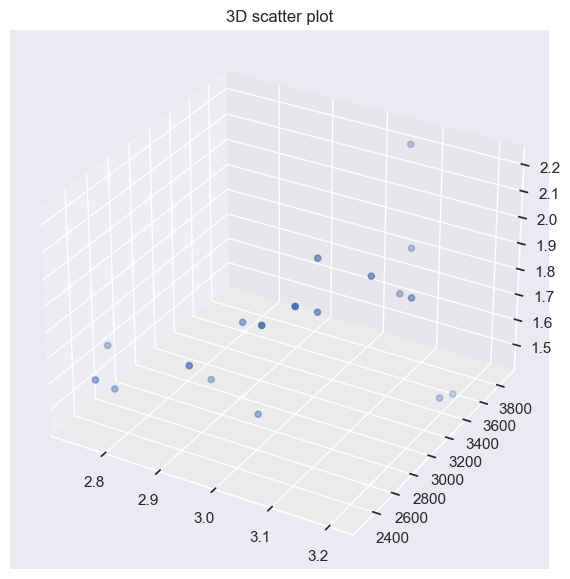

In [11]:
# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

# Creating dataset
z_plot = df['DurV_BefGue_t']
x_plot = df['GewVuW_BefGueM_Kt']
y_plot = df['Bruttoinlandsprodukt']

# Creating plot
ax.scatter3D(x_plot, y_plot, z_plot)
plt.title('3D scatter plot')

# show plot
plt.show()

In [ ]:
import pandas as pd
import statsmodels.api as sm
import dash
from dash import html, dcc
from dash.dependencies import Input, Output

# Daten einlesen
road_BIP_merge = pd.read_csv('road_BIP_Eisen_merge.csv')

# Dash-App initialisieren
app = dash.Dash(__name__)

# Layout der Dash-App definieren
app.layout = html.Div([
    html.H4('Multiple Regression mit ausgewählten Spalten'),
    html.P("Wählen Sie die Spalten für die Regression:"),
    html.Label('Abhängige Variable (y):'),
    dcc.Dropdown(
        id='y-dropdown',
        options=[{'label': col, 'value': col} for col in road_BIP_merge.columns[1:]],
        value=None,
    ),
    html.Label('Unabhängige Variablen (x):'),
    dcc.Dropdown(
        id='x-dropdown',
        options=[{'label': col, 'value': col} for col in road_BIP_merge.columns[1:]],
        value=[],
        multi=True
    ),
    html.Div(id='regression-results')
])

# Callback-Funktion für Regressionsergebnisse
@app.callback(
    Output('regression-results', 'children'),
    Input('y-dropdown', 'value'),
    Input('x-dropdown', 'value')
)
def multi_regression(y_column, x_columns):
    if y_column is not None and len (x_columns) > 0:
        x = road_BIP_merge[x_columns]
        x = sm.add_constant(x)
        y = road_BIP_merge[y_column]
        model = sm.OLS(y, x).fit()
        result = model.summary()

        return html.Div([
            html.H5("Regressionskoeffizienten:"),
            html.Pre(
                # Verwenden Sie result_html als Text
                children=result.as_text()
            )
        ])

    # Wenn keine Variablen ausgewählt sind, keine Ergebnisse anzeigen
    return html.Div()

# Dash-App starten
if __name__ == '__main__':
    app.run_server(port=8050)